In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
import os, sys

In [2]:
# set random state

seed = 69

## Load Dataset

In [3]:
filepath = '../../../data/interim/data_op_01.csv'
data_op_1 = pd.read_csv(filepath)
data_op_1.head()

,unit,time_step,operational_setting_1,operational_setting_2,operational_setting_3,Sensor_0,Sensor_1,Sensor_2,Sensor_3,Sensor_4,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Health_state,Operational_condition
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735,1,1
14,1,15,9.9988,0.2500,20.0,489.05,604.63,1497.87,1302.51,10.52,...,8124.37,8.6496,0.03,369,2319,100.0,28.84,17.0805,1,1
15,1,16,9.9987,0.2500,20.0,489.05,604.61,1500.47,1311.39,10.52,...,8127.07,8.6609,0.03,369,2319,100.0,28.71,17.1759,1,1
17,1,18,10.0066,0.2507,20.0,489.05,604.23,1502.57,1304.56,10.52,...,8119.39,8.6646,0.03,367,2319,100.0,28.60,17.1096,1,1
35,1,36,10.0024,0.2504,20.0,489.05,604.43,1499.85,1306.89,10.52,...,8121.73,8.6260,0.03,369,2319,100.0,28.52,17.1036,2,1


Then, drop the labels

In [4]:
labels_op_01 =  np.array(data_op_1['Health_state'])

# Pipeline

In [5]:
from phm08ds.features.feature_selection import SelectSensors

tf_select_sensors = SelectSensors(kind='custom', sensors=[1,2,3,6,8,10,11,12,13,14,19,20])
data_op_1 = tf_select_sensors.fit_transform(data_op_1)
data_op_1.head()

,unit,time_step,operational_setting_1,operational_setting_2,operational_setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_6,Sensor_8,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_19,Sensor_20,Operational_condition
0,1,1,10.0047,0.2501,20.0,604.13,1499.45,1309.95,394.88,8770.20,45.40,372.15,2388.13,8120.83,8.6216,28.58,17.1735,1
14,1,15,9.9988,0.2500,20.0,604.63,1497.87,1302.51,394.93,8771.08,45.39,371.84,2388.12,8124.37,8.6496,28.84,17.0805,1
15,1,16,9.9987,0.2500,20.0,604.61,1500.47,1311.39,394.44,8775.86,45.52,372.19,2388.08,8127.07,8.6609,28.71,17.1759,1
17,1,18,10.0066,0.2507,20.0,604.23,1502.57,1304.56,394.31,8778.55,45.10,372.03,2388.06,8119.39,8.6646,28.60,17.1096,1
35,1,36,10.0024,0.2504,20.0,604.43,1499.85,1306.89,394.36,8771.15,45.36,371.77,2388.11,8121.73,8.6260,28.52,17.1036,1


In [6]:
from phm08ds.features.feature_selection import RemoveInfo

tf_remove_info = RemoveInfo()

data_with_features = tf_remove_info.fit_transform(data_op_1)
data_with_features.head()

,Sensor_1,Sensor_2,Sensor_3,Sensor_6,Sensor_8,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_19,Sensor_20
0,604.13,1499.45,1309.95,394.88,8770.20,45.40,372.15,2388.13,8120.83,8.6216,28.58,17.1735
14,604.63,1497.87,1302.51,394.93,8771.08,45.39,371.84,2388.12,8124.37,8.6496,28.84,17.0805
15,604.61,1500.47,1311.39,394.44,8775.86,45.52,372.19,2388.08,8127.07,8.6609,28.71,17.1759
17,604.23,1502.57,1304.56,394.31,8778.55,45.10,372.03,2388.06,8119.39,8.6646,28.60,17.1096
35,604.43,1499.85,1306.89,394.36,8771.15,45.36,371.77,2388.11,8121.73,8.6260,28.52,17.1036


In [7]:
data_with_features.head()

,Sensor_1,Sensor_2,Sensor_3,Sensor_6,Sensor_8,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_19,Sensor_20
0,604.13,1499.45,1309.95,394.88,8770.20,45.40,372.15,2388.13,8120.83,8.6216,28.58,17.1735
14,604.63,1497.87,1302.51,394.93,8771.08,45.39,371.84,2388.12,8124.37,8.6496,28.84,17.0805
15,604.61,1500.47,1311.39,394.44,8775.86,45.52,372.19,2388.08,8127.07,8.6609,28.71,17.1759
17,604.23,1502.57,1304.56,394.31,8778.55,45.10,372.03,2388.06,8119.39,8.6646,28.60,17.1096
35,604.43,1499.85,1306.89,394.36,8771.15,45.36,371.77,2388.11,8121.73,8.6260,28.52,17.1036


In [8]:
from sklearn.preprocessing import StandardScaler

tf_std_scaller = preprocessing.StandardScaler()
data_with_features_std = tf_std_scaller.fit_transform(data_with_features)
data_with_features_std

array([[-1.66575294, -0.46078266, -0.16893857, ..., -1.17034624,
         0.37766506,  0.67593128],
       [-0.60824032, -0.73264726, -1.06544604, ..., -0.42029381,
         2.17941314, -0.40216143],
       [-0.65054083, -0.28527512,  0.00457901, ..., -0.11759408,
         1.2785391 ,  0.70375303],
       ...,
       [ 1.76058794,  1.3837671 ,  1.64094613, ...,  2.10309687,
        -0.93899701, -0.46823808],
       [ 2.18359299,  0.99833879,  1.8867627 , ...,  0.5708469 ,
        -2.04776506, -1.91265047],
       [ 1.50678491,  0.44772693,  1.865073  , ...,  1.52448499,
        -0.45391098, -0.46823808]])

In [9]:
X = data_with_features_std
y = labels_op_01

In [10]:
from sklearn.pipeline import Pipeline

data_preprocessing = Pipeline([('select_sensors', tf_select_sensors),
                               ('remove_info', tf_remove_info),
                               ('std_scaler', tf_std_scaller)
                              ])

In [11]:
from sklearn.externals import joblib

joblib.dump(data_preprocessing, '../../../models/pipeline/select-sensorNavar_remove-info_std-scaller-OP1.pkl')

['../../../models/pipeline/select-sensorNavar_remove-info_std-scaller-OP1.pkl']

# Classification steps

## Load classifiers

In [12]:
classifiers = joblib.load('models/classifiers.pkl')

In [13]:
mlp_clf = classifiers['MLP']

In [14]:
mlp_clf.set_params()

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=17, learning_rate='adaptive',
       learning_rate_init=0.0005, max_iter=1300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

## Load model selection object

In [15]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits = 2, random_state=69, shuffle=True)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [16]:
mlp_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=17, learning_rate='adaptive',
       learning_rate_init=0.0005, max_iter=1300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [17]:
y_hat = mlp_clf.predict(X_test)
y_hat_proba = mlp_clf.predict_proba(X_test)

### Performance acessment

In [18]:
from sklearn import metrics

In [19]:
conf_mat = metrics.classification.confusion_matrix(y_test, y_hat)
acc = metrics.classification.accuracy_score(y_test, y_hat)
acc

0.6402208660273176

In [20]:
from phm08ds.utils import metrics as met

In [21]:
met.conf_mat_percentage(conf_mat)

array([[ 8, 30, 60,  0],
       [ 5, 25, 69,  0],
       [ 1,  7, 84,  6],
       [ 0,  0, 18, 81]])

## Filter by the mode

In [22]:
from scipy import stats

# Create a function called "chunks" with two arguments, l and n:
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield l[i:i+n]

def predict_mode(y_hat, t):
    y_hat_mode = []
    for k in list(chunks(y_hat, t)):
        result_mode = stats.mode(k)
        y_hat_mode.append(result_mode.mode)
    
    return np.array(y_hat_mode)

In [23]:
t = 3

y_test_mode = predict_mode(y_test, t)
y_hat_mode = predict_mode(y_hat, t)

print('acc: {}'.format(metrics.accuracy_score(y_test_mode, y_hat_mode)))

met.conf_mat_percentage(metrics.confusion_matrix(y_test_mode, y_hat_mode))

acc: 0.6460331299040977


array([[12, 30, 56,  0],
       [ 4, 25, 69,  0],
       [ 2,  5, 87,  5],
       [ 0,  1, 20, 78]])

In [24]:
acc_with_mode = []

for t in np.arange(1, 125):
    y_test_mode = predict_mode(y_test, t)
    y_hat_mode = predict_mode(y_hat, t)
    
    
    acc_with_mode.append(metrics.accuracy_score(y_test_mode, y_hat_mode))
    
acc_with_mode = np.array(acc_with_mode)

## Generate figure

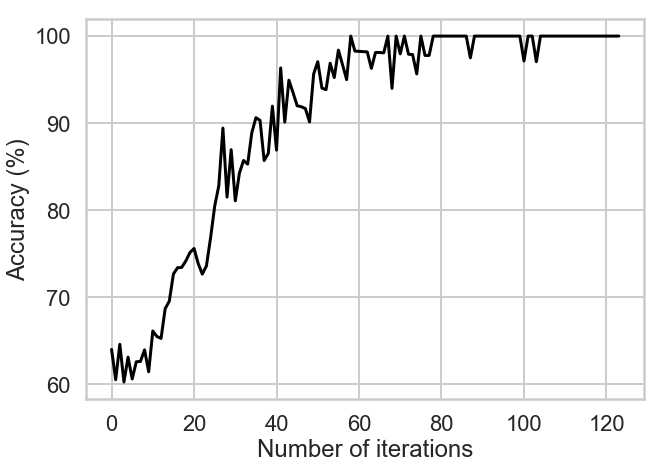

In [25]:
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context("poster")

plt.figure(figsize=(10,7))
# ax = plt.subplots()
plt.plot(acc_with_mode*100, 'k')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy (%)')

# fig.savefig('myimage.svg', format='eps', dpi=1200, bbox_inches='tight')
plt.savefig('./figures/predictions_by_mode-OC1.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('./figures/predictions_by_mode-OC1.png', format='png', dpi=300, bbox_inches='tight')